In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pasemos ahora al análisis del archivo tip.json. Al igual que antes cargamos el archivo y vemos las columnas que tienen para luego hacer el análisis EDA del mismo. 

In [3]:
df_tip = pd.read_json(r'C:\GitHub\Bases\Grupal_Henry\Yelp\Yelp-20250213T170414Z-003\Yelp\tip.json', lines=True)

In [4]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [11]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [5]:
df_tip.shape

(908915, 5)

A diferencia del anterior este archivo cuenta con una columna de reseñas de los establecimientos por lo que será utilizado para un análisis de emociones para la API de recomendación. También hacer una recopilación de las reseñas positivas y negativas de cada comercio, y un análisis de los horarios en las cuales fueron hechas estas reseñas. Además, cuenta con una columna con la identificación del comercio que fue reseñado y del usuario que hizo la reseña. Vemos que cuenta con 908915 reseñas en total.
Comenzando a hacer un pre análisis de los datos veamos cuentas reseña tiene cada comercio y cuantas reseñas hizo cada usuario. Para esto vamos a usar la funcion value_counts() que cuenta la frecuencia de cada valor único. Y la funcion reset_index() que convierte ese datos en una nueva columna. 

In [6]:
df_tip["user_id"].value_counts().reset_index()

,user_id,count
0,fCvMnJU1Z-XhAjKg99wK3Q,4071
1,5Y5KbsI5buMcNh2hTFaRpA,1385
2,lMY8NBPyzlPbbu-KBYfD9A,1373
3,Rr4cLb6Go91FT134o6RsKg,1230
4,qjfMBIZpQT9DDtw_BWCopQ,1230
...,...,...
301753,M-q6aVScljiJ09vdIzDxWA,1
301754,X01tGj-AFQFr634yFAXF8w,1
301755,SyQjE8WDUItQM_Q_axaoXg,1
301756,gQ6w_mMSsLotwSm1LQjMfQ,1


In [7]:
df_tip["business_id"].value_counts().reset_index()

,business_id,count
0,FEXhWNCMkv22qG04E83Qjg,2571
1,-QI8Qi8XWH3D8y8ethnajA,1011
2,_ab50qdWOk0DdB6XOrBitw,932
3,ytynqOUb3hjKeJfRj5Tshw,827
4,Eb1XmmLWyt_way5NNZ7-Pw,826
...,...,...
106188,JnQd5ZdfFhIDDq1CTcSaaA,1
106189,xRaddmd73rkdLxUx7Grtcg,1
106190,JjRSWWCp8Yd2gnqIMY0DiA,1
106191,4D2NVjVRANfHaROxuqlkDA,1


Observamos que hay reseñas de 301758 usuarios realizadas a 106193 comercios distintos. Este dato nos puede servir para determinar los usuarios que más reseñas hacen, junto con el dato de “compliment_count” podemos ver la popularidad del usuario. Además podemos determinar cuales son los comercios más reseñados y tratar de encontrar una justificación. 
Siguiendo con el EDA tradicional, hacemos un gráfico de frecuencias de las variables numéricas, vemos los tipos de datos y si tiene nulos, duplicados y datos faltantes. 

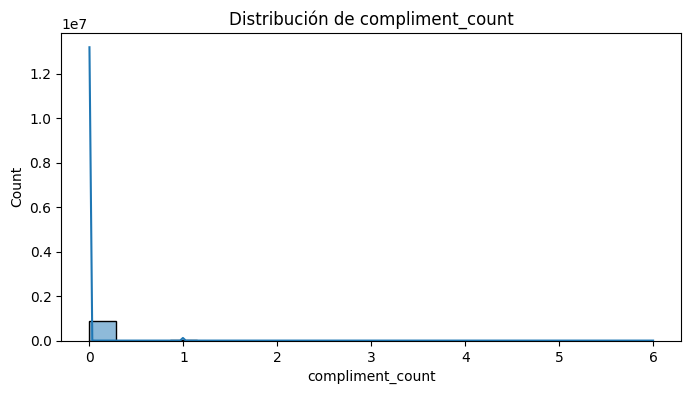

In [8]:
        plt.figure(figsize=(8, 4))
        sns.histplot(df_tip["compliment_count"], kde=True)
        plt.title(f'Distribución de compliment_count')
        plt.show()

In [9]:
print("\nResumen estadístico:\n", df_tip["compliment_count"].describe(include='all'))


Resumen estadístico:
 count    908915.000000
mean          0.012525
std           0.120763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: compliment_count, dtype: float64


Las estadisticas de la columna de "cumpliment_count" nos dice que  la mayot parte de las reseñas tiene 0 impresiones. Vemos que el cuartil 75 es 0 por lo que, por lo menos, el 75% de las reseñas tiene ese valor 

In [10]:
 # 1. Tipos de datos
print("\n1. Tipos de datos:")
print(df_tip.dtypes)
    
    # 2. Valores faltantes
print("\n2. Valores faltantes:")
print(df_tip.isnull().sum())
    
    # 3. Valores nulos
print("\n3. Valores nulos:")
print(df_tip.isna().sum())
    
    # 4. Duplicados
print("\n4. Duplicados:")
print(f"Número de filas duplicadas: {df_tip.duplicated().sum()}")
    


1. Tipos de datos:
user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object

2. Valores faltantes:
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

3. Valores nulos:
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

4. Duplicados:
Número de filas duplicadas: 67


borrar los duplicados

Observamos que solo existen 67 filas duplicadas por lo que serán eliminadas del dataset para su uso 